#                      Titanic Survival Data analysis
## Project - Investigate a data set - Titanic

Following is the analysis of the Titanic survival data provided from Kaggle(www.kaggle.com) in partial fulfillment for the Machine Learning Foundation Nanodegree.


## Data Analysis process

The following procedure was followed for the data analysis of the given data set
    1. Problem statement definition
    2. Acquiring Data
    3. Data wrangling
    4. Analyses and visualization
    5. Reporting Findings
    
In addition, the following procedures were done on each analysis stage to ease up further process:
    1. Analyzing data before and after wrangling
    2. Combining multiple columns for easier analysis
    3. Dropping columns which are no longer necessary

## Problem statement definition

RMS Titanic  was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

Further details on the disaster can be obtained from the following link(https://en.wikipedia.org/wiki/RMS_Titanic)

In this project, which category of people likely survived and those who did not.

## Objective

The key objective will bw arriving at an answer for the following questions
1. Which class of the passengers survived the most?
2. What factors made people more likely to survive?
3. To which sex did more of the survivors belong?
4. Which age band has the most survivors?
5. Which of the features had an impact on survival?

### Workflow

1. Classify data - classifying data to groups
2. Correlate - correlating the data to survival rate
3. Convert - convert the data to a suitable format for analysis
4. Complete - based on estimated, complete the data which are missing
5. Correct - analyze the data for errors and correct them
6. Create - create new features, if required any
7. Chart - based on the findings, visualize to a chart

In [31]:
#importing packages needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.expand_frame_repr', False)

## Data Acquiring

Acquiring the data from .csv file and storing them in a Pandas DataFrame

Storing them in a dataframe by the name "titanic"

In [32]:
titanic=pd.read_csv('titanic-data.csv')

## Data Analysis

#### What are the features present in the dataset?
The following features are present in the dataset

In [33]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### Which of the data features are of categorical type?
The categorical data present in the dataset are:
1. Survived
2. Sex
3. Embarked
4. Pclass

#### Which of the data features are of numerical type?
The numerical data present in the dataset are:
1. Parch
2. SibSp
3. Fare
4. Age

### Preview of the data

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data overview

#### What are the data types of the data features?

* 7 features are of int or float
* 5 features are of String type

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Which are the data containing blank(null) data??
From the above it can also be inferred that a few of the following values are missing from the dataset:
1. Age
2. Cabin
3. Embarked

#### What is the distribution of the data?

* There are 891 passengeres in the sample
* 38% of the sample survived
* Most passengers from the saple are in Pclass 2
* On average, 52% and 38% were accompanied by siblings or spouses and parents respectively.

In [36]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Assumptions made on the data
Based on the preliminary analysis, we can make the below assumptions across the stages
#### 1. Correlate
We need to correlate the features with the survival as that is the main target of this data analysis
#### 2. Complete
Features such as Embarked and Age, for which a few values are missing, have to be completed with the values provided. This is because the survival rate depends on these features also.
#### 3. Correct
* The cabin feature can be dropped as it does not impact survival chance.

* The passenger ID can also be dropped as it does not impact survival.

#### 4. Create
* A new feature named Family may be created from Parch and SibSp to categorise according to family surviva;
* A new feature to categorise the Name feature may be created

#### Further Assumptions
Based on the analysis abouve, the following can be further assumed
1. The upper class(Pclass=1) were more likely to have survived
2. Females and children were more likely to have survived.

## Detailed analysis

To make a standpoint on out assumption, we further analyze the survival rates with each of the depending features
* Pclass
* Sex
* Parch and SibSp

#### Pclass Vs. survival

We observe that Pclass 1 had higher survival rate

In [37]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Sex Vs. survival

75% of the females survived while only 19% of the males survived

In [38]:
titanic[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Parch and SubSp Vs. survival

* Those who had 1 sibling or accompanied by spouse survived the most
* A family of 3 is more likely to have survived

In [39]:
titanic[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [40]:
titanic[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualizing data

Further validating out assumptions by visualizing the features against survival

### Age plot

From the age vs. survived plot the following can be inferred
1. Infants and old people survied
2. Most people are in the age group of 15-35
3. People in the range 20-38 did not survive much

In addition we need to consider ages of people where the data is missing. This will be done on later stages.

In [41]:
temp=[titanic]
for data in temp:
    data['Passenger_survived']=data['Survived']

titanic['Passenger_survived'].replace({0:'No', 1:'Yes'}, inplace=True)    

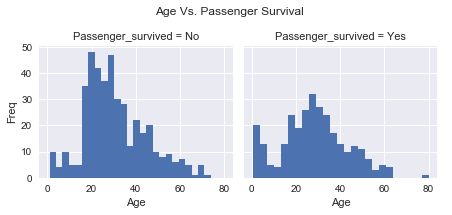

In [42]:
age_plot=sns.FacetGrid(titanic,col='Passenger_survived')
am=age_plot.map(plt.hist,'Age',bins=25)
age_plot.add_legend()
plt.subplots_adjust(top=0.8)
am.fig.suptitle('Age Vs. Passenger Survival')
am.set_ylabels("Freq")
sns.plt.show()

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


### Pclass plot

By combining the age and  Pclass vs. survived plot, the following can be inferred

1. Pclass=1 have higher rates of survival
2. Infants(age=1-10) from Pclass=2 and 3 survived
3. Pclass=3 has the least survival rate

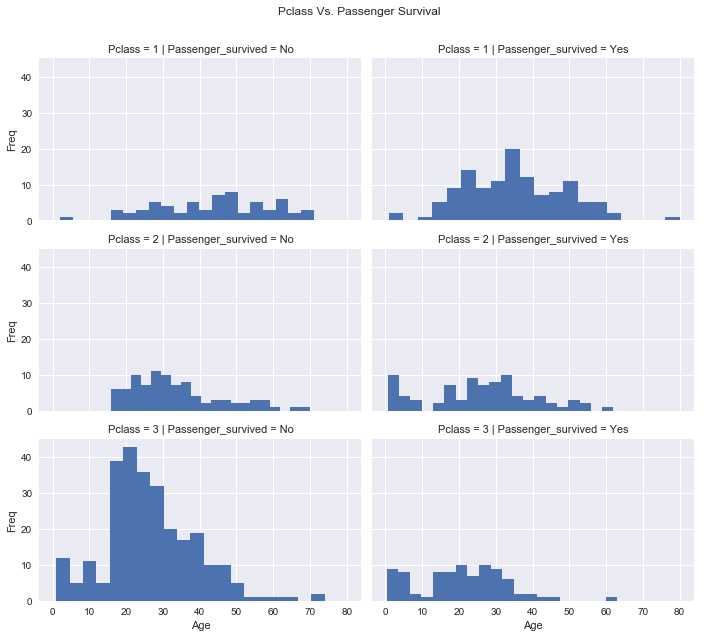

In [44]:
pclass_plot=sns.FacetGrid(titanic,col="Passenger_survived",row='Pclass',aspect=1.6)
pm=pclass_plot.map(plt.hist,'Age',bins=20)
pclass_plot.add_legend()
plt.subplots_adjust(top=0.9)
pm.fig.suptitle('Pclass Vs. Passenger Survival')
pm.set_ylabels("Freq")
pm.fig
sns.plt.show()

### Sex plot

By combining the age and Sex vs. survived plot, the following can be inferred

1. Females were the most to survive, further proving the assumption
2. Few men in the age groups 1-10 and 25-35 had higher survival rates.

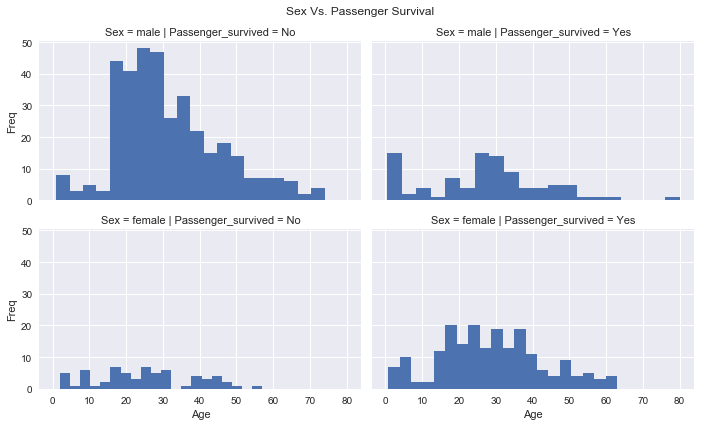

In [45]:
sex_plot=sns.FacetGrid(titanic,col="Passenger_survived",row='Sex',aspect=1.6)
sm=sex_plot.map(plt.hist,'Age',bins=20)
sex_plot.add_legend()
plt.subplots_adjust(top=0.9)
sm.fig.suptitle('Sex Vs. Passenger Survival')
sm.set_ylabels("Freq")
sns.plt.show()

## Data Wrangling

Now we can further wrangle the data to arrive at a more refined analysis.

### Dropping features
Since the features Ticket and Cabin do not have any impact on the rates of survival, we can drop them from the dataframe.

In [46]:
# Before dropping
print("Before",titanic.shape,titanic.columns.values)

#dropping features
titanic=titanic.drop(['Ticket','Cabin'],axis=1)

# After dropping
print("After",titanic.shape,titanic.columns.values)

('Before', (891, 13), array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Passenger_survived'], dtype=object))
('After', (891, 11), array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Passenger_survived'], dtype=object))


### Creating new features from existing features

Often we may need features from the existing features to arrive at a more refined solution.

We define a temporary panda series to achieve this goal.

In [47]:
import string
import re
temp=[titanic]

### Passenger title - new feature
In the following code, we retrieve the Title of the passenger using RegEx


In [48]:
for data in temp:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(titanic['Title'], titanic['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Now categorizing the Titles to a more common Title according to usage and then comparing with survived feature.

It can be observed that:
1. 50% of 'Master's survived and 15% of 'Mr's survived
2. 70% of 'Miss's and 79% of 'Mrs's survived.
3. It can be concluded that on an averafe 75% of the women of the sample survived.

In [49]:
for data in temp:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Converting the Titles into numerical values.

In [50]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in temp:
    data['Title']=data['Title'].map(title_mapping)
    data['Title']=data['Title'].fillna(0)


In [51]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Passenger_survived,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,No,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Yes,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Yes,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Yes,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,No,1


### Dropping Name and passenger ID
Since we have wrangled Name into numerical form of Title, we don not need the feature for further analysis and hence can be dropped. Passenger Id also can be dropped as it has no correlation with the survival.

In [52]:
titanic=titanic.drop(['PassengerId','Name'],axis=1)
temp=[titanic]

titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Passenger_survived,Title
0,0,3,male,22.0,1,0,7.2500,S,No,1
1,1,1,female,38.0,1,0,71.2833,C,Yes,3
2,1,3,female,26.0,0,0,7.9250,S,Yes,2
3,1,1,female,35.0,1,0,53.1000,S,Yes,3
4,0,3,male,35.0,0,0,8.0500,S,No,1


### Create new feature FamilySize

From the features Parch and SubSp, we can combine to form a new feature which denotes the family size of the passenger

In [53]:
for data in temp:
    data['FamilySize']=data['Parch']+data['SibSp']+1
    
titanic[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived', ascending=False)    

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Now creating a new feature by the name isAlone to denote if the passenger travelled alone and then relate that with survival.

In [54]:
for data in temp:
    data['isAlone']=0
    data.loc[data['FamilySize']==1,'isAlone']=1

titanic[['isAlone','Survived']].groupby('isAlone').mean()

,Survived
isAlone,
0,0.505650
1,0.303538


### Dropping features
Since isAlone feature alone performs the actions of Parch, SibSp and FamilySize, we can drop the three features with isAlone as the key feature for the analysis.

In [55]:
titanic=titanic.drop(['Parch','SibSp','FamilySize'],axis=1)
temp=[titanic]

titanic.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Passenger_survived,Title,isAlone
0,0,3,male,22.0,7.2500,S,No,1,0
1,1,1,female,38.0,71.2833,C,Yes,3,0
2,1,3,female,26.0,7.9250,S,Yes,2,1
3,1,1,female,35.0,53.1000,S,Yes,3,0
4,0,3,male,35.0,8.0500,S,No,1,1


## Completing missing data

### Missing Age data
The feature Age is guessed for a few passengers. The age of the guessed data is either +0.5 or -0.5, hence doesn't make an effect on the analysis. Therefore the guessed age provided can be taken as is and no further analysis on age is required.

### Missing Embarked data

2 of the embarked data are missing from the dataset. We can fill this by comparing the entire data set and using the most occured value for the missing datafield

In [56]:
freq_port=titanic.Embarked.dropna().mode()[0]

freq_port

'S'

Since 'S' is the most common port, we can use that to fill the missing port details.

Later we can compare with survival field to arrive at a detailed conclusion correlating port and survival.

In [57]:
for data in temp:
    data['Embarked']=data['Embarked'].fillna(freq_port)

titanic[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Correlating Categorical features

Now we can correlate categorical features with one another

Based on the plot below, we can infer the following:
1. Females had a higher chance of survival.
2. In Embarked = C, the male survival is higher. This may be due the ccorrealation between Pclass and Survived.
3. Ports of embarking have varied survival rates for Pclass=3

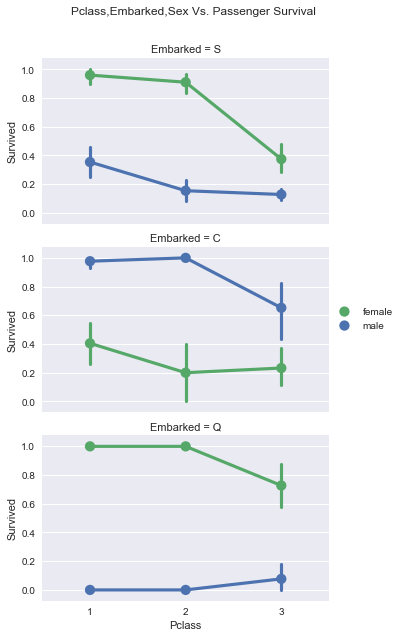

In [58]:
cat_plot=sns.FacetGrid(titanic,row='Embarked',aspect=1.6)
cc=cat_plot.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
cat_plot.add_legend()
plt.subplots_adjust(top=0.9)
cc.fig.suptitle('Pclass,Embarked,Sex Vs. Passenger Survival')
sns.plt.show()

## Correlating categotical and numerical features

Now we can correlate categorical features and numerical features with one another

Based on the plot below the following can be inferred:
1. People who paid higher fares survived more.
2. Embarking point correlates with the survival rate.

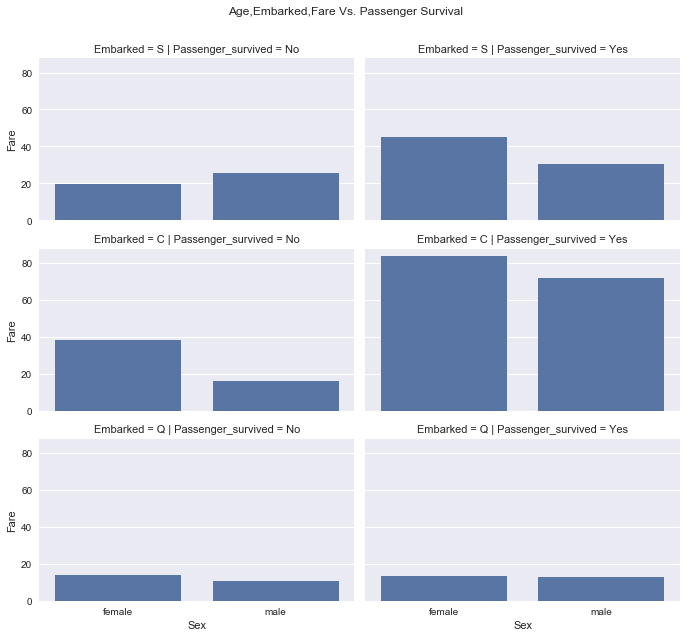

In [59]:
catnum_plot=sns.FacetGrid(titanic,row='Embarked',col='Passenger_survived',aspect=1.6)
cn=catnum_plot.map(sns.barplot,'Sex','Fare',ci=None)
catnum_plot.add_legend()
plt.subplots_adjust(top=0.9)
cn.fig.suptitle('Age,Embarked,Fare Vs. Passenger Survival')
sns.plt.show()

Now converting the ports to numerical data to facilitate easier analysis and dropping Passenger_survived feature as Survived feature serves the same purpose.

* S-0
* C-1
* Q-2

In [60]:
for data in temp:
    data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

titanic=titanic.drop(['Passenger_survived'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,male,22.0,7.2500,0,1,0
1,1,1,female,38.0,71.2833,1,3,0
2,1,3,female,26.0,7.9250,0,2,1
3,1,1,female,35.0,53.1000,0,3,0
4,0,3,male,35.0,8.0500,0,1,1


## Conclusion
From the analysis above, the following assumptions can be validated as true.

1. Pclass=1 survived in larger numbers thatn the other two classes.
2. Females and infants had higher rates of survival.
3. Port of embarking correlates to survival rate.
4. Lone passengers survived more than family accompanied passengers.

These observations and plots answers all the questions posed at the beginning of the analysis.

#### Limitations faced in analysis
Though the analysis is on point, there are a few limitations posed by the dataset.
1. Port of embarking data is not available for all passengers.
2. Age of a few passengers are guessed.
3. The dataset is not complete

The limitations were overcomed by making the missing and guessed data in congruent with the rest of the dataset, thus reducing the accuracy of the analysis by a small factor.

## References
1. Kaggle competition Forums(https://www.kaggle.com/c/titanic)
2. Pandas and Seaborn documentation